# **Face Mask Detection with Deep Learning**

## 1. Setup & Installation

In [1]:
!pip install tensorflow opencv-python matplotlib numpy scikit-learn kaggle

Import Libraries

In [2]:
from google.colab import files
files.upload()  # Upload kaggle.json

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset
!unzip face-mask-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/with_mask/with_mask_3297.jpg  
  inflating: data/with_mask/with_mask_3298.jpg  
  inflating: data/with_mask/with_mask_3299.jpg  
  inflating: data/with_mask/with_mask_33.jpg  
  inflating: data/with_mask/with_mask_330.jpg  
  inflating: data/with_mask/with_mask_3300.jpg  
  inflating: data/with_mask/with_mask_3301.jpg  
  inflating: data/with_mask/with_mask_3302.jpg  
  inflating: data/with_mask/with_mask_3303.jpg  
  inflating: data/with_mask/with_mask_3304.jpg  
  inflating: data/with_mask/with_mask_3305.jpg  
  inflating: data/with_mask/with_mask_3306.jpg  
  inflating: data/with_mask/with_mask_3307.jpg  
  inflating: data/with_mask/with_mask_3308.jpg  
  inflating: data/with_mask/with_mask_3309.jpg  
  inflating: data/with_mask/with_mask_331.jpg  
  inflating: data/with_mask/with_mask_3310.jpg  
  inflating: data/with_mask/with_mask_3311.jpg  
  inflating: data/with_mask/with_mask_3312.jpg  
  inflating: data/with

## 2. Load & Preprocess Dataset

In [4]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split

# Load images
data_path = "data"
categories = ["with_mask", "without_mask"]
images = []
labels = []

for category in categories:
    path = os.path.join(data_path, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (128, 128))
        images.append(img)
        labels.append(categories.index(category))

# Convert to numpy arrays
images = np.array(images) / 255.0
labels = np.array(labels)

# Split into train & test
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# **3. Build CNN Model**

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,898 (12.61 MB)

 Trainable params: 3,304,898 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

# **4. Train the Model**

Epoch 1/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.7408 - loss: 0.5348 - val_accuracy: 0.8901 - val_loss: 0.2609
Epoch 2/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9072 - loss: 0.2323 - val_accuracy: 0.9232 - val_loss: 0.2036
Epoch 3/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9219 - loss: 0.2104 - val_accuracy: 0.9272 - val_loss: 0.1777
Epoch 4/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9385 - loss: 0.1517 - val_accuracy: 0.9378 - val_loss: 0.1653
Epoch 5/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9515 - loss: 0.1376 - val_accuracy: 0.9424 - val_loss: 0.1560
Epoch 6/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9647 - loss: 0.0981 - val_accuracy: 0.9490 - val_loss: 0.1481
Epoch 7/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9701 - loss: 0.0912 - val_accuracy: 0.9636 - val_loss: 0.1253
Epoch 8/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.9793 - loss: 0.0664 - val_acc

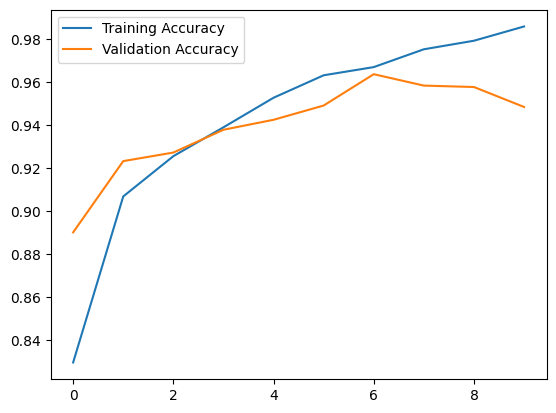

In [6]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    validation_data=(X_test, y_test))

# Plot accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# **5. Real-Time Detection**

*Run cell For Sample Images*

In [ ]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

# Load Haar Cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Path to sample images (place your images in a folder named 'samples')
sample_folder = 'samples'

# Loop through all images in the sample folder
for img_name in os.listdir(sample_folder):
    if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
        img_path = os.path.join(sample_folder, img_name)
        frame = cv2.imread(img_path)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces
        faces = face_cascade.detectMultiScale(gray, 1.1, 4)

        for (x, y, w, h) in faces:
            face_roi = frame[y:y+h, x:x+w]
            resized_face = cv2.resize(face_roi, (128, 128))
            normalized_face = resized_face / 255.0
            reshaped_face = np.reshape(normalized_face, (1, 128, 128, 3))

            # Predict using your model
            pred = model.predict(reshaped_face)
            label = "Mask" if pred[0][0] > pred[0][1] else "No Mask"
            color = (0, 255, 0) if label == "Mask" else (0, 0, 255)

            cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)
            cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

        # Show the result using matplotlib (for Colab compatibility)
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.title(img_name)
        plt.axis('off')
        plt.show()


*Run Cell for Real Time Camera Feed*



In [ ]:
import cv2

# Load Haar Cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Enable Webcam in Colab
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def start_webcam():
    js = Javascript('''
        async function startWebcam() {
            const stream = await navigator.mediaDevices.getUserMedia({video: true});
            const video = document.createElement('video');
            video.srcObject = stream;
            await video.play();
            return video;
        }
    ''')
    display(js)
    return eval_js('startWebcam()')

video = start_webcam()

# Run Detection
while True:
    frame = video.capture()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    for (x,y,w,h) in faces:
        face_roi = frame[y:y+h, x:x+w]
        resized_face = cv2.resize(face_roi, (128,128))
        normalized_face = resized_face / 255.0
        reshaped_face = np.reshape(normalized_face, (1,128,128,3))

        pred = model.predict(reshaped_face)
        label = "Mask" if pred[0][0] > pred[0][1] else "No Mask"
        color = (0,255,0) if label == "Mask" else (0,0,255)

        cv2.rectangle(frame, (x,y), (x+w,y+h), color, 2)
        cv2.putText(frame, label, (x,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

    cv2.imshow('Face Mask Detection', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()